In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


Info in <TUnixSystem::ACLiC>: creating shared library /home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti_cc.so


In [2]:
date = "JUN20"

chain = ROOT.TChain("events")
chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
df_D0Star = ROOT.RDataFrame(chain)

In [3]:
df_D0Star = df_D0Star.Define("scale", "w*lumiIntegrated")\
        .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423)[3]")\
        .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423)[0]")\
        .Define("goodMeson_ditrk_pt_GEN2", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[0]")\
        .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423))")\
        .Define("goodMeson_trk1_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423)")\
        .Define("goodMeson_trk2_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423)")\
        .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423))")\
        .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
        .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 211, 421, 423)")\
        .Define("goodMeson_mass_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
        .Define("goodMeson_pt_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[0]")\
        .Define("HCandMass_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25, 22, 25)[3]")\
        .Define("HCandMassMissing", "compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)")\
        .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25, 22, 25)[3]")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


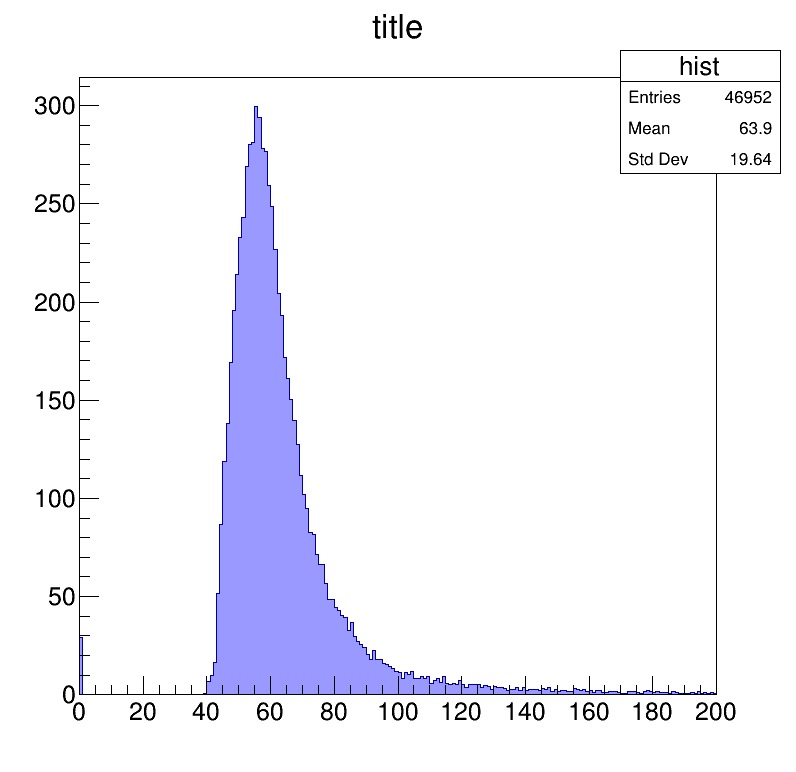

In [27]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh = 200, 0, 200

h = df_D0Star.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_ditrk_pt_GEN2", "scale")
h.SetFillColor(ROOT.kBlue-9)
h.Draw("hist")

canvas.Draw()

In [31]:
dfnew = df_D0Star.Filter("goodMeson_ditrk_pt_GEN  < 35").Filter("goodMeson_ditrk_pt_GEN  > 5")

cols = ["goodMeson_ditrk_pt", "goodMeson_ditrk_pt_GEN", "goodMeson_ditrk_pt_GEN2", "GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_pt", "GenPart_mass"]

x = df_D0Star.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"]<30) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] == 0)])

,goodMeson_ditrk_pt,goodMeson_ditrk_pt_GEN,goodMeson_ditrk_pt_GEN2,GenPart_pdgId,GenPart_genPartIdxMother,GenPart_pt,GenPart_mass
17541,[76.17157745361328],29.542547,29.542547,"[2212, 2212, -4, 21, 25, -4, -4, 25, -4, -4, 2...","[-1, -1, 6, 1, 2, 2, 9, 4, 5, 12, 7, 8, 17, 9,...","[0.0, 0.0, 0.0, 0.0, 100.25, 100.25, 5.0237591...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 0.0, 12..."
21977,[93.48023986816406],22.541727,22.541727,"[2212, 2212, 4, 21, 25, 4, 4, 25, 4, 4, 25, 4,...","[-1, -1, 6, 1, 2, 2, 9, 4, 5, 12, 7, 8, 15, 10...","[0.0, 0.0, 0.0, 0.0, 125.0, 125.0, 4.141131881...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 0.0, 12..."
29237,[79.7205581665039],19.830717,19.830717,"[2212, 2212, 21, -4, 25, -4, 25, -4, 4, 25, -4...","[-1, -1, 0, 1, 2, 2, 4, 5, 1, 6, 7, 8, 9, 10, ...","[0.0, 0.0, 0.0, 0.0, 66.0, 66.0, 55.625, 77.5,...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
44328,[54.24728775024414],13.427914,13.427914,"[2212, 2212, 21, 21, 25, 21, 25, 21, 5, -5, -4...","[-1, -1, 0, 1, 2, 2, 4, 5, 7, 7, 1, 1, 6, 8, 1...","[0.0, 0.0, 0.0, 0.0, 114.5, 114.5, 145.5, 109....","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
45819,[100.7873306274414],17.456028,17.456028,"[2212, 2212, 21, 21, 25, 21, 4, -4, 25, 4, -4,...","[-1, -1, 0, 1, 2, 2, 5, 5, 4, 6, 7, 8, 9, 10, ...","[0.0, 0.0, 0.0, 0.0, 195.5, 195.5, 42.125, 200...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 0.0, 0...."


,goodMeson_ditrk_pt,goodMeson_ditrk_pt_GEN,goodMeson_ditrk_pt_GEN2,GenPart_pdgId,GenPart_genPartIdxMother,GenPart_pt,GenPart_mass
21,[63.10845947265625],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 9, 10, 11, 11...","[0.0, 0.0, 0.0, 0.0, 5.625, 5.625, 3.46875, 1....","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
256,[83.73422241210938],2.098004,0.0,"[2212, 2212, 21, 1, 25, 1, 25, 25, 25, -4, -4,...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 1, 0, 8, 10, 1, ...","[0.0, 0.0, 0.0, 0.0, 35.125, 35.125, 34.625, 5...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
1154,[79.2448959350586],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 4, 4,...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 11, 1, 0, 10, 0,...","[0.0, 0.0, 0.0, 0.0, 104.75, 104.75, 101.5, 10...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
1871,[81.85407257080078],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 21, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 5, 8, 5, 1, 10, ...","[0.0, 0.0, 0.0, 0.0, 52.625, 52.625, 55.5, 55....","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
2031,[45.45106887817383],1.344144,0.0,"[2212, 2212, 21, 21, 25, 21, 5, -5, 25, 5, -5,...","[-1, -1, 0, 1, 2, 2, 5, 5, 4, 6, 7, 10, 8, 9, ...","[0.0, 0.0, 0.0, 0.0, 13.75, 13.75, 2.6015625, ...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 0.0, 0...."
...,...,...,...,...,...,...,...
46254,[58.873443603515625],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 0,...","[0.0, 0.0, 0.0, 0.0, 12.875, 12.875, 14.375, 1...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
46420,[58.435997009277344],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 9, 9, 0, 5, 5...","[0.0, 0.0, 0.0, 0.0, 10.03125, 10.03125, 8.968...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
46677,[61.085697174072266],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 22, 4...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 8, 0, 0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 6.484375, 6.484375, 8.843...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 125.0, ..."
46679,[101.3012924194336],0.000000,0.0,"[2212, 2212, 21, 21, 25, 21, 4, 25, 4, 4, 25, ...","[-1, -1, 6, 1, 2, 2, 9, 4, 6, 12, 7, 8, 14, 11...","[0.0, 0.0, 0.0, 0.0, 102.75, 102.75, 1.4210854...","[0.9375, 0.9375, 0.0, 0.0, 125.0, 0.0, 0.0, 12..."


In [30]:
rownum = 44328
part_id = pddf.iloc[rownum]["GenPart_pdgId"]
mother_idx = pddf.iloc[rownum]["GenPart_genPartIdxMother"]
part_pt = pddf.iloc[rownum]["GenPart_pt"]
part_mass = pddf.iloc[rownum]["GenPart_mass"]
print(pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN"], pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN2"])

width = 8
#print(len(part_id), len(mother_idx), len(part_pt), len(part_mass))
print("Index".ljust(width), "ID".ljust(width), "Mum idx".ljust(width), "PT".ljust(width), "Mass".ljust(width))
print("---------------------------------------------------------------------------")
for e in range(len(part_id)):
    print(str(e).ljust(width), str(part_id[e]).ljust(width), str(mother_idx[e]).ljust(width), str(round(part_pt[e], 3)).ljust(width), str(round(part_mass[e], 4)).ljust(width))

13.427914 13.427914
Index    ID       Mum idx  PT       Mass    
---------------------------------------------------------------------------
0        2212     -1       0.0      0.9375  
1        2212     -1       0.0      0.9375  
2        21       0        0.0      0.0     
3        21       1        0.0      0.0     
4        25       2        114.5    125.0   
5        21       2        114.5    0.0     
6        25       4        145.5    125.0   
7        21       5        109.0    0.0     
8        5        7        74.25    0.0     
9        -5       7        36.875   0.0     
10       -4       1        18.25    0.0     
11       4        1        21.0     0.0     
12       25       6        146.0    125.0   
13       5        8        73.5     0.0     
14       -4       10       18.25    0.0     
15       -5       9        36.5     0.0     
16       4        11       20.938   0.0     
17       25       12       147.0    125.0   
18       5        13       73.5     0.0     
19  